In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

In [ ]:
#reading the csv in drive
spectral_features=pd.read_csv('/content/drive/MyDrive/W1/spectral_features.csv')
concatenated_df_spectral=pd.read_csv('/content/drive/MyDrive/W1/concatenated_df_spectral.csv')

In [ ]:
#selecting spectral features based on PCC
num1,num2,num3 = list(),list(),list()
from scipy.stats import pearsonr

for i in concatenated_df_spectral.columns:
    X=concatenated_df_spectral['{}'.format(i)].astype(float)
    y=concatenated_df_spectral['Wear'].astype(float)

    correlation,pvalue=pearsonr(X,y)

    num3.append(pvalue)
    num1.append(i)
    num2.append(correlation)

correlation_tables = pd.DataFrame({'Feature':num1,'Correlation':num2,'P-value':num3}).sort_values('Correlation',ascending=False)
correlation_tables

/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


,Feature,Correlation,P-value
1840,Wear,1.000000,0.000000e+00
642,2_Spectral decrease,0.530664,5.945202e-217
1090,4_MFCC_3,0.512549,4.387091e-200
1320,5_MFCC_3,0.504896,2.935373e-193
648,2_Spectral roll-on,0.447070,6.096382e-147
...,...,...,...
1080,4_LPCC_5,-0.441399,7.332331e-143
1082,4_LPCC_7,-0.441399,7.332331e-143
1071,4_Fundamental frequency,-0.441570,5.535114e-143
1559,6_Median frequency,NaN,NaN


In [ ]:
correlation_tables['Feature'].unique()

array(['Wear', '2_Spectral decrease', '4_MFCC_3', ...,
       '4_Fundamental frequency', '6_Median frequency',
       '6_Spectral roll-on'], dtype=object)

In [ ]:
#selecting the spectral features having correlation more than 0.4
to_model=correlation_tables.iloc[1:17,0:2]
to_model

,Feature,Correlation
642,2_Spectral decrease,0.530664
1090,4_MFCC_3,0.512549
1320,5_MFCC_3,0.504896
648,2_Spectral roll-on,0.447070
390,1_LPCC_5,0.445552
392,1_LPCC_7,0.445552
680,2_Wavelet standard deviation_8,0.433657
670,2_Wavelet energy_8,0.433445
679,2_Wavelet standard deviation_7,0.421093
669,2_Wavelet energy_7,0.420964


In [ ]:
#getting the values for selected spectral features with highest correlation
to_model = spectral_features[['2_Spectral decrease', '4_MFCC_3', '5_MFCC_3', '2_Spectral roll-on', '1_LPCC_5', '1_LPCC_7', '2_Wavelet standard deviation_8', '2_Wavelet energy_8', '2_Wavelet standard deviation_6', '2_Wavelet energy_6']].copy()
to_model

,2_Spectral decrease,4_MFCC_3,5_MFCC_3,2_Spectral roll-on,1_LPCC_5,1_LPCC_7,2_Wavelet standard deviation_8,2_Wavelet energy_8,2_Wavelet standard deviation_6,2_Wavelet energy_6
0,-0.596173,-47.087146,-47.363393,0.000000,0.142253,0.142253,26.712951,26.779497,26.845851,26.878348
1,-0.280097,-65.339781,-63.711948,0.000000,0.216138,0.216138,40.565825,40.576701,46.528236,46.529597
2,-0.195036,-25.403602,-26.381526,1.006711,0.021028,0.021028,29.293696,29.308103,32.737424,32.740937
3,-0.379500,-75.998968,-73.839316,0.000000,0.272991,0.272991,39.958934,40.000710,42.954893,42.966676
4,-0.161205,-68.319153,-66.563928,2.013423,0.043829,0.043829,23.683896,23.686172,22.423535,22.423853
...,...,...,...,...,...,...,...,...,...,...
2986,-0.032169,33.481576,34.540000,2.013423,0.175473,0.175473,44.325293,44.344262,44.913833,44.922915
2987,-0.161925,24.916803,25.483093,1.006711,0.484344,0.484344,46.224520,46.278036,46.708566,46.735738
2988,-0.239194,81.938148,82.475291,0.000000,0.274349,0.274349,45.974898,46.070602,42.544544,42.591231
2989,-0.254537,37.183258,38.211260,0.000000,0.364474,0.364474,49.442827,49.467801,47.169425,47.182789


In [ ]:
#using MinMax scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
min_max_scaled=scaler.fit_transform(to_model)
min_max_scaled=pd.DataFrame(min_max_scaled, columns=to_model.columns)

In [ ]:
#using standard scaler
from sklearn.preprocessing import StandardScaler
scaler1=StandardScaler()
std_scaled=scaler1.fit_transform(to_model)
std_scaled=pd.DataFrame(std_scaled, columns=to_model.columns)

In [ ]:
#splitting all spectral features data for training and testing
from sklearn.model_selection import train_test_split
X = spectral_features
y = concatenated_df_spectral['Wear']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
#passing all spectral features to knn
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train.astype(float), y_train.astype(float))
y_pred_knn = knn.predict(X_test)

In [ ]:
#checking performance of knn model on all spectral features
mse_knn = mean_squared_error(y_test, y_pred_knn)
mape_knn = mean_absolute_percentage_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("Mean squared error for KNN model:", mse_knn)
print("Mean absolute percentage error for KNN model:", mape_knn)
print("R2 score for KNN model:", r2_knn)

Mean squared error for KNN model: 0.0012292875626043404
Mean absolute percentage error for KNN model: 0.1840081042907153
R2 score for KNN model: 0.13623336201982972


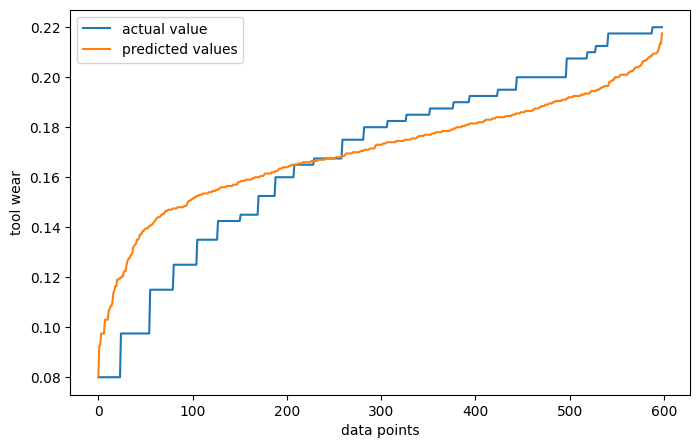

In [ ]:
graph=pd.DataFrame({'Actual':y_test,'Predict':y_pred_knn}).sort_values('Actual',ascending=True)
size=np.arange(0,graph.shape[0],1)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5), dpi=100)
plt.ylabel('tool wear')
plt.xlabel('data points')
plt.plot(size,graph.Actual, label='actual value')
plt.plot(size,graph.Predict.sort_values(), label='predicted values')
plt.plot(title='actual value')
plt.legend()


In [ ]:
#passing all spectral features to decision tree
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(max_depth=9)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)

In [ ]:
#checking performance of decision tree model on all spectral features

mse_dt = mean_squared_error(y_test, y_pred_dt)
mape_dt = mean_absolute_percentage_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Mean squared error for DT model:", mse_dt)
print("Mean absolute percentage error for DT model:", mape_dt)
print("R2 score for DT model:", r2_dt)

Mean squared error for DT model: 1.0434056761265556e-08
Mean absolute percentage error for DT model: 1.897101229434037e-05
R2 score for DT model: 0.9999926684443874


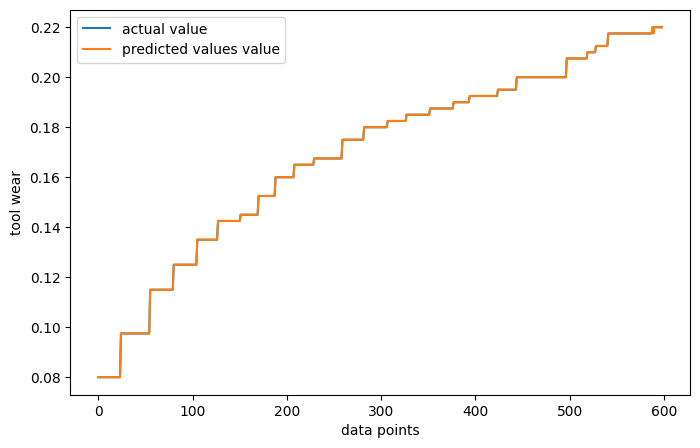

In [ ]:
graph=pd.DataFrame({'Actual':y_test,'Predict':y_pred_dt}).sort_values('Actual',ascending=True)
size=np.arange(0,graph.shape[0],1)
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5), dpi=100)
plt.ylabel('tool wear')
plt.xlabel('data points')
plt.plot(size,graph.Actual, label='actual value')
plt.plot(size,graph.Predict, label='predicted values value')
plt.plot(title='actual value')
plt.legend()

In [ ]:
#splitting selected spectral features data for training and testing
X = to_model.astype(float)
y = concatenated_df_spectral['Wear'].astype(float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
#passing selected spectral features to knn
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train.astype(float), y_train.astype(float))
y_pred_knn = knn.predict(X_test)

In [ ]:
#checking performance of knn model on selected spectral features
mse_knn = mean_squared_error(y_test, y_pred_knn)
mape_knn = mean_absolute_percentage_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("Mean squared error for KNN model:", mse_knn)
print("Mean absolute percentage error for KNN model:", mape_knn)
print("R2 score for KNN model:", r2_knn)

Mean squared error for KNN model: 0.0008317721202003338
Mean absolute percentage error for KNN model: 0.15270509605807622
R2 score for KNN model: 0.41555008796397985


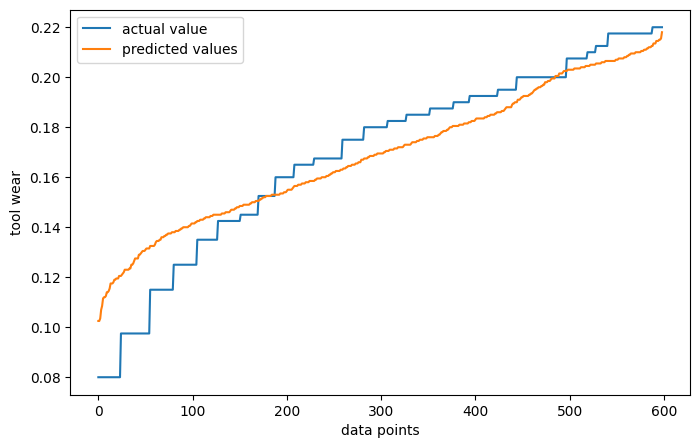

In [ ]:
graph=pd.DataFrame({'Actual':y_test,'Predict':y_pred_knn}).sort_values('Actual',ascending=True)
size=np.arange(0,graph.shape[0],1)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5), dpi=100)
plt.ylabel('tool wear')
plt.xlabel('data points')
plt.plot(size,graph.Actual, label='actual value')
plt.plot(size,graph.Predict.sort_values(), label='predicted values')
plt.plot(title='actual value')
plt.legend()

In [ ]:
#passing selected spectral features to decision tree
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(max_depth=3)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)

In [ ]:
#checking performance of decision tree model on selected spectral features

mse_dt = mean_squared_error(y_test, y_pred_dt)
mape_dt = mean_absolute_percentage_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Mean squared error for DT model:", mse_dt)
print("Mean absolute percentage error for DT model:", mape_dt)
print("R2 score for DT model:", r2_dt)

Mean squared error for DT model: 0.0007769212271677586
Mean absolute percentage error for DT model: 0.15235610138028238
R2 score for DT model: 0.45409141296086064


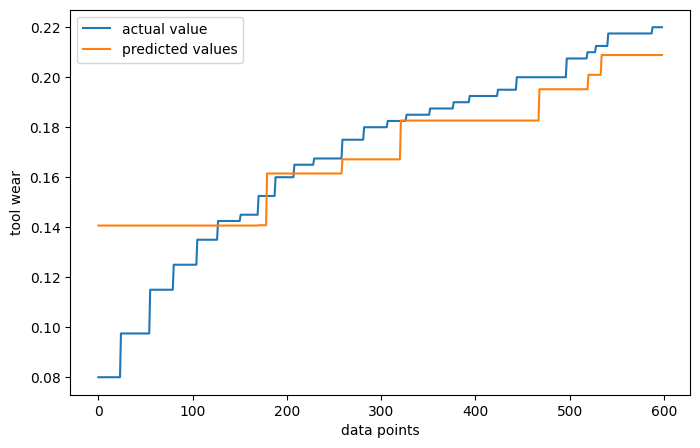

In [ ]:
graph=pd.DataFrame({'Actual':y_test,'Predict':y_pred_dt}).sort_values('Actual',ascending=True)
size=np.arange(0,graph.shape[0],1)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5), dpi=100)
plt.ylabel('tool wear')
plt.xlabel('data points')
plt.plot(size,graph.Actual, label='actual value')
plt.plot(size,graph.Predict.sort_values(), label='predicted values')
plt.plot(title='actual value')
plt.legend()

In [ ]:
#passing selected spectral features to random forest
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, n_jobs=3)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)

In [ ]:
#checking performance of random forest model on selected spectral features

mse_rf = mean_squared_error(y_test, y_pred_dt)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_dt)
r2_rf = r2_score(y_test, y_pred_dt)

print("Mean squared error for RF model:", mse_rf)
print("Mean absolute percentage error for RF model:", mape_rf)
print("R2 score for RF model:", r2_rf)

Mean squared error for RF model: 0.0007769212271677586
Mean absolute percentage error for RF model: 0.15235610138028238
R2 score for RF model: 0.45409141296086064


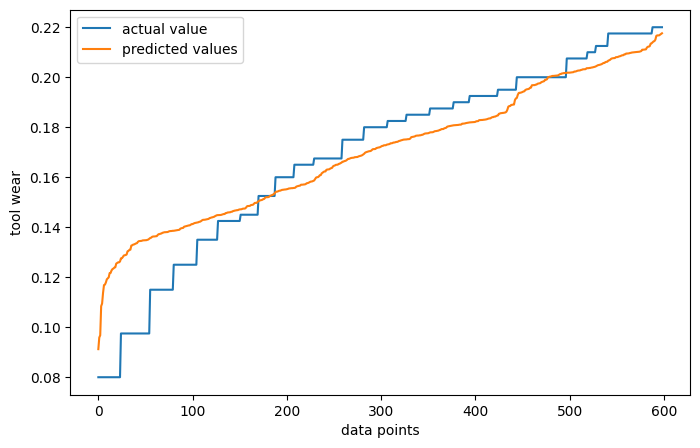

In [ ]:
graph=pd.DataFrame({'Actual':y_test,'Predict':y_pred}).sort_values('Actual',ascending=True)
size=np.arange(0,graph.shape[0],1)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5), dpi=100)
plt.ylabel('tool wear')
plt.xlabel('data points')
plt.plot(size,graph.Actual, label='actual value')
plt.plot(size,graph.Predict.sort_values(), label='predicted values')
plt.plot(title='actual value')
plt.legend()

In [ ]:
#splitting scaled selected spectral features data for training and testing
from sklearn.model_selection import train_test_split
X = std_scaled.astype(float)
y = concatenated_df_spectral['Wear'].astype(float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
#passing scaled selected spectral features to knn
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train.astype(float), y_train.astype(float))
y_pred_knn = knn.predict(X_test)

In [ ]:
#checking performance of knn model on scaled selected spectral features
mse_knn = mean_squared_error(y_test, y_pred_knn)
mape_knn = mean_absolute_percentage_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("Mean squared error for KNN model:", mse_knn)
print("Mean absolute percentage error for KNN model:", mape_knn)
print("R2 score for KNN model:", r2_knn)

Mean squared error for KNN model: 0.0006981318864774625
Mean absolute percentage error for KNN model: 0.13655279457931216
R2 score for KNN model: 0.5094532387752781


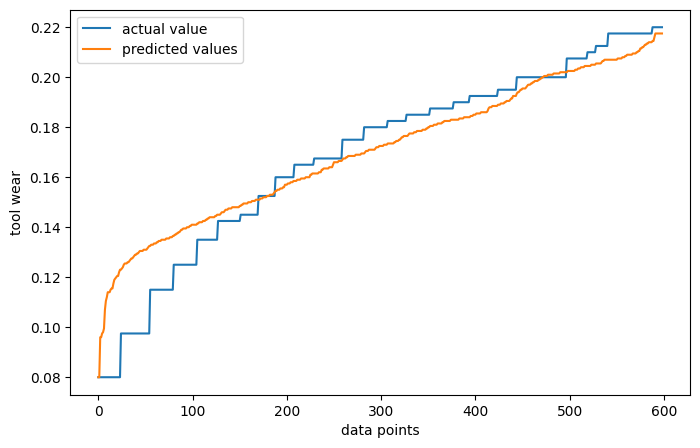

In [ ]:
graph=pd.DataFrame({'Actual':y_test,'Predict':y_pred_knn}).sort_values('Actual',ascending=True)
size=np.arange(0,graph.shape[0],1)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5), dpi=100)
plt.ylabel('tool wear')
plt.xlabel('data points')
plt.plot(size,graph.Actual, label='actual value')
plt.plot(size,graph.Predict.sort_values(), label='predicted values')
plt.plot(title='actual value')
plt.legend()

In [ ]:
#passing scaled selected spectral features to decision tree
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(max_depth=3)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)

In [ ]:
#checking performance of decision tree model on scaled selected spectral features

mse_dt = mean_squared_error(y_test, y_pred_dt)
mape_dt = mean_absolute_percentage_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Mean squared error for DT model:", mse_dt)
print("Mean absolute percentage error for DT model:", mape_dt)
print("R2 score for DT model:", r2_dt)

Mean squared error for DT model: 0.0007769212271677581
Mean absolute percentage error for DT model: 0.1523561013802823
R2 score for DT model: 0.454091412960861


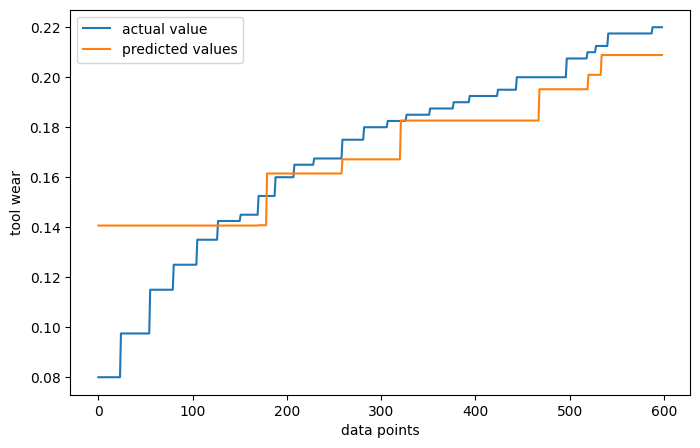

In [ ]:
graph=pd.DataFrame({'Actual':y_test,'Predict':y_pred_dt}).sort_values('Actual',ascending=True)
size=np.arange(0,graph.shape[0],1)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5), dpi=100)
plt.ylabel('tool wear')
plt.xlabel('data points')
plt.plot(size,graph.Actual, label='actual value')
plt.plot(size,graph.Predict.sort_values(), label='predicted values')
plt.plot(title='actual value')
plt.legend()

In [ ]:
#passing scaled selected spectral features to random forest
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, n_jobs=3)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)

In [ ]:
#checking performance of random forest model on scaled selected spectral features

mse_rf = mean_squared_error(y_test, y_pred_dt)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_dt)
r2_rf = r2_score(y_test, y_pred_dt)

print("Mean squared error for RF model:", mse_rf)
print("Mean absolute percentage error for RF model:", mape_rf)
print("R2 score for RF model:", r2_rf)

Mean squared error for RF model: 0.0007769212271677581
Mean absolute percentage error for RF model: 0.1523561013802823
R2 score for RF model: 0.454091412960861


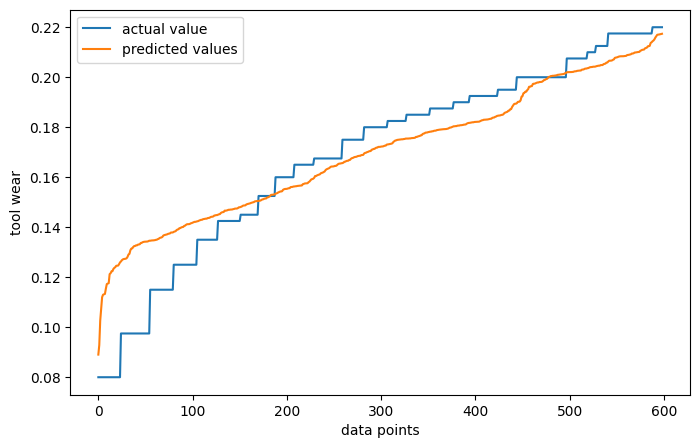

In [ ]:
graph=pd.DataFrame({'Actual':y_test,'Predict':y_pred}).sort_values('Actual',ascending=True)
size=np.arange(0,graph.shape[0],1)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5), dpi=100)
plt.ylabel('tool wear')
plt.xlabel('data points')
plt.plot(size,graph.Actual, label='actual value')
plt.plot(size,graph.Predict.sort_values(), label='predicted values')
plt.plot(title='actual value')
plt.legend()